# [NML23] Assignment 1: Graph theory basics

TAs: [Ortal Senouf](https://people.epfl.ch/ortal.senouf) and [William Cappelletti](https://people.epfl.ch/william.cappelletti)

## Students

* Team: `1`
* Students: `Yixuan Xu`, `Justin Deschenaux`

## Rules

> ⚠️ **Read carefully before starting**

**Deadline:** March 28th

**Grading:**
* The integrality of Assignment 1 will be scaled to 100% and will amount to 25% of the overall assignments score.
* The total number of points for part A is **50**, the points for each exercise are stated in the instructions.
* All team members will receive the same grade based on the team solution.
* Collaboration between team members is encouraged. No collaboration between teams is allowed.

**Expected output:**

You will have coding and theoretical questions.

Coding exercises shall be solved within the specified space:
```python
# Your solution here ###########################################################
...
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
```
You can create any additional variables or functions that you think necessary, but if a variable is explicitly stated, you shall use it for the corresponding values, as it will be re-used afterwards. Anything outside shall not be touched, except if otherwise stated. Failing to comply to instructions will be penalized.

Theoretical questions shall be answered in the following markdown cell. The first line will be 
> **Your answer here:**

**Submission:**
* Your submission is self-contained in the `.ipynb` file.

* Code has to be clean and readable. Provide meaningful variable names and comment where needed.

* Textual answers in [markdown cells][md_cells] shall be short: one to two
  sentences. Math shall be written in [LaTeX][md_latex].
    **NOTE**: handwritten notes pasted in the notebook are ignored

* You cannot import any other library than we imported.
  Note that Networkx is imported in the second section and cannot be used in the first except for the Question 4 of Section 1 (at the indicated portion only).

* Make sure all cells are executed before submitting. I.e., if you open the notebook again it should show numerical results and plots. Cells not run are ignored.

* Execute your notebook on **google colab** from a blank state before submission, to make sure it is reproducible. You can click "Kernel" then "Restart Kernel and Run All Cells" in Jupyter. We might re-run cells to ensure that the code is working and corresponds to the results.

[md_cells]: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html
[md_latex]: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html#LaTeX-equations

## Objective

The purpose of this assignment is to explore a given dataset, representing it as a network and constructing different graphs. In the first section, you will analyze the network properties. In the second section, you will explore various network models and find out the network model fitting the ones you construct from the dataset.

## Cora Dataset

The [Cora dataset](https://linqs.soe.ucsc.edu/node/236) consists of scientific publications classified into one of seven research fields. 

* **Citation graph:** the citation network can be constructed from the connections given in the `cora.cites` file.
* **Feature graph:** each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary and its research field, given in the `cora.content` file. The dictionary consists of 1433 unique words. A feature graph can be constructed using the Euclidean distance between the feature vector of the publications.

The [`README`](data/cora/README) provides details about the content of [`cora.cites`](data/cora/cora.cites) and [`cora.content`](data/cora/cora.content).

Let us first download the cora dataset, it will be saved in the current working directory in the (new) `cora` folder

In [2]:
!pip install networkx==3.0 -q

_files = !ls cora
if _files != ['README', 'cora.cites', 'cora.content']:
    !wget https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz
    !tar -xvf cora.tgz

--2023-03-24 15:24:22--  https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz
Resolving linqs-data.soe.ucsc.edu (linqs-data.soe.ucsc.edu)... 128.114.47.74
Connecting to linqs-data.soe.ucsc.edu (linqs-data.soe.ucsc.edu)|128.114.47.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168052 (164K) [application/x-gzip]
Saving to: ‘cora.tgz.3’

cora.tgz.3          100%[===================>] 164.11K   246KB/s    in 0.7s    

2023-03-24 15:24:24 (246 KB/s) - ‘cora.tgz.3’ saved [168052/168052]

cora/
cora/README
cora/cora.cites
cora/cora.content


## Part A: Network Properties

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

### Question 1 [16pt]: Construct a Citation Graph and a Feature Graph 

#### Part 1.1: Data loading and exploration


**1.1.1 [2pt]** Read the `cora.content` file into a Pandas DataFrame, indexed by the papers ID. Check the `README` file to identify the column names and
the data format. Then, print 5 random rows and print out the number of papers
contained in each of the reasearch fields.

*Hints:*
- Use the `read_csv` function to load data;
- Sort papers by id;
- Pandas DataFrames have a `value_counts()` method.

In [4]:
# Your solution here ###########################################################

# Create columns name in advance for convenience
column_names = ['paper_id'] + [str(i) for i in range(1, 1434)] + ['class_label']

# Read into pandas dataframe
cora = pd.read_csv('cora/cora.content', sep='\t', header=None, names=column_names)\
         .set_index('paper_id').sort_values(by='paper_id')

# Print 5 random rows, sort by id in ascending order
display(cora.sample(n=5).sort_values(by='paper_id'))

# Number of papers contained in each of the research fields
print(cora['class_label'].value_counts())

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

,1,2,3,4,5,6,7,8,9,10,...,1425,1426,1427,1428,1429,1430,1431,1432,1433,class_label
paper_id,,,,,,,,,,,,,,,,,,,,,
16461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Neural_Networks
16843,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Probabilistic_Methods
255628,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Neural_Networks
1111978,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Probabilistic_Methods
1152277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Neural_Networks


Neural_Networks           818
Probabilistic_Methods     426
Genetic_Algorithms        418
Theory                    351
Case_Based                298
Reinforcement_Learning    217
Rule_Learning             180
Name: class_label, dtype: int64


**1.1.2 [1pt]** Select all papers from the field `Genetic_Algorithms` and store their feature vectors into a NumPy array.
Check its shape.

In [5]:
my_field = 'Genetic_Algorithms'
# Your solution here ###########################################################
cora_my_field = cora[cora['class_label'] == my_field]
features = cora_my_field.drop(columns=['class_label']).values
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

print("{} nodes with {} features".format(*features.shape))

418 nodes with 1433 features


**1.1.3 [2pt]** Let $D$ be the Euclidean distance matrix whose $(i,j)$ entry corresponds to the Euclidean distance between feature vectors $i$ and $j$.
Using the feature vectors of the papers from the field which you have selected, construct $D$ as a Numpy array.

*Bonus 1pt* if you can do it without for loops

In [6]:
# Your solution here ###########################################################
def all_pairs_distance(features):
    """
    Compute the pairwise Euclidean distances between all pairs of nodes in the graph.

    Args:
        features: A numpy array of shape (N, F) where N is the number of nodes and F is the number of features.

    Returns:
        A numpy array of shape (N, N) where D[i, j] is the Euclidean distance between node i and node j.
    """
    v1 = features[:, np.newaxis, :]
    v2 = features[np.newaxis, :, :]
    return np.sqrt(np.sum((v1 - v2) ** 2, axis=-1))
D = all_pairs_distance(features)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**1.1.4 [1pt]** Compute and print the mean pairwise distance $\mathbb{E}[D]$.

In [7]:
# Your solution here ###########################################################
mean_distance = np.mean(D)
print(mean_distance)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

5.60816976752409


**1.1.5 [2pt]** Plot an histogram of the euclidean distances.

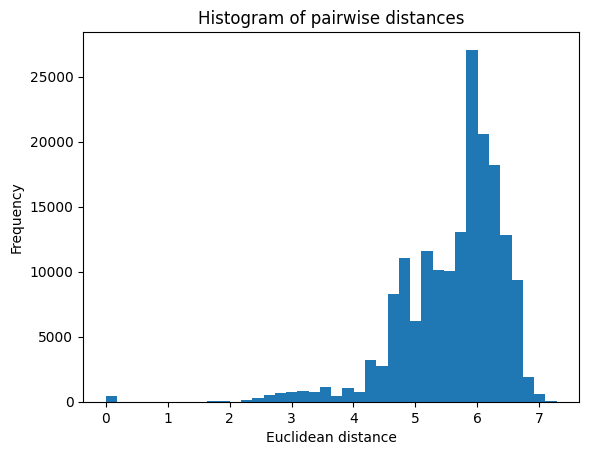

In [8]:
# Your solution here ###########################################################

plt.hist(D.flatten(), bins=40)
plt.xlabel('Euclidean distance')
plt.ylabel('Frequency')
plt.title('Histogram of pairwise distances')
plt.show()

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

#### Part 1.2: Building graphs

**1.2.1 [2pt]** First, we will create an adjacency matrix for the papers by thresholding the Euclidean distance matrix.
The resulting (unweighted) adjacency matrix should have entries
$$ A_{ij} = \begin{cases} 1, \; \text{if} \; d(i,j)< \mathbb{E}[D], \; i \neq j, \\ 0, \; \text{otherwise.} \end{cases} $$

Build such adjacency matrix using the average distance as threshold

In [9]:
# Your solution here ###########################################################
A_feature = (D < mean_distance).astype(int)
np.fill_diagonal(A_feature, 0) # Set the diagonal to all 0s
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**1.2.2 [3pt]** Now read the `cora.cites` file and construct the citation graph by converting the given citation connections into an adjacency matrix `A_citation`.

*Hint:*
- The edges are between `paper_id`s. Not all integers correspond to IDs;
- Check the README for the connection description

In [39]:
cora_cites = np.genfromtxt('cora/cora.cites', delimiter='\t', dtype=int)
# get graph edges and flatten them for processing
print("Cites head:")
print(cora_cites[:5], end="\n\n")

# Your solution here ###########################################################
original_nodes = np.unique(cora_cites)
n_nodes = len(original_nodes)
idx_mapping = {idx: i for i, idx in enumerate(original_nodes)}

A_citation = np.zeros((n_nodes, n_nodes), dtype=int)

# cora_cites [[<ID of cited paper>, <ID of citing paper>]], thus swap indices, j <- i in the data but A[i, j] = 1
for j, i in cora_cites:
    A_citation[idx_mapping[i], idx_mapping[j]] = 1

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
print("Adj shape:", A_citation.shape)

Cites head:
[[     35    1033]
 [     35  103482]
 [     35  103515]
 [     35 1050679]
 [     35 1103960]]

Adj shape: (2708, 2708)


**1.2.3 [2pt]** Get the adjacency matrix of the citation graph for the field that you chose.
You have to appropriately reduce the adjacency matrix of the citation graph.

In [40]:
# Your solution here ###########################################################
# Retrieve paper indices by paper id in selected field
my_field_indices = list(map(lambda x: idx_mapping[x], cora_my_field.index))

A_citation = A_citation[my_field_indices][:, my_field_indices]

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

print("Adj shape:", A_citation.shape)

Adj shape: (418, 418)


**1.2.4 [1pt]** Test whether the citation graph is directed or undirected.

*Hint:* You can check if the adjacency is symmetric.

In [41]:
# Your solution here ###########################################################

# Test if the matrices are symmetric.
print("Feature matrix is symmetric:", np.array_equal(A_feature, A_feature.T))
print("Citation matrix is symmetric:", np.array_equal(A_citation, A_citation.T))
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Feature matrix is symmetric: True
Citation matrix is symmetric: False


### Question 2 [18pt]: Degree Distribution and Moments

**2.1 [1pt]** Compute the total number of edges in each graph

In [13]:
# Your solution here ###########################################################
num_edges_feature = np.sum(A_feature) // 2
num_edges_citation = np.sum(A_citation)  # citation graph is directed, hence edges are not counted twice

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

print(f"Number of edges in the feature graph: {num_edges_feature}")
print(f"Number of edges in the citation graph: {num_edges_citation}")

Number of edges in the feature graph: 35340
Number of edges in the citation graph: 848


**2.2 [2pt]** Plot both in-degree and out-degree distributions histogram for each of the graphs.

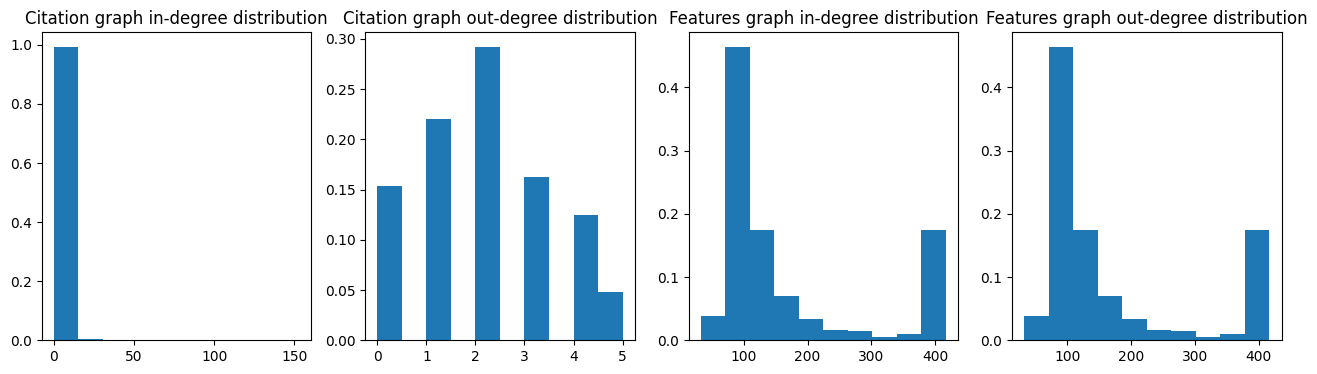

In [14]:
# Your solution here ###########################################################
# A_citation[i, j] = 1 means that paper i cites paper j, hence edge from i to j
def compute_in_degree(adj):
    return np.sum(adj, axis=0)

def compute_out_degree(adj):
    return np.sum(adj, axis=1)

# In degrees
degrees_citation_in = compute_in_degree(A_citation)
degrees_feature_in = compute_in_degree(A_feature)

# Out degrees
degrees_citation_out = compute_out_degree(A_citation)
degrees_feature_out = compute_out_degree(A_feature)

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

deg_hist_normalization = np.ones(degrees_citation_in.shape[0]) / degrees_citation_in.shape[0]
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes[0].set_title('Citation graph in-degree distribution')
axes[0].hist(degrees_citation_in, weights=deg_hist_normalization);
axes[1].set_title('Citation graph out-degree distribution')
axes[1].hist(degrees_citation_out, weights=deg_hist_normalization);
axes[2].set_title('Features graph in-degree distribution')
axes[2].hist(degrees_feature_in, weights=deg_hist_normalization);
axes[3].set_title('Features graph out-degree distribution')
axes[3].hist(degrees_feature_out, weights=deg_hist_normalization);

**2.3 [2pt]** From here onwards, we will consider only undirected graphs. If any of the graph is directed, make it undirected. Then compute the degree distribution and compare with the above ones.

In [15]:
# Your solution here ###########################################################

# Make undirected by taking element-wise maximum with transpose
A_citation = np.maximum(A_citation, A_citation.T) 

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**2.4 [2pt]** Calculate the first and second moments of the degree distribution of each graph.

In [16]:
# Your solution here ###########################################################
citation_degree = compute_in_degree(A_citation)
feature_degree = compute_in_degree(A_feature)

cit_moment_1 = np.mean(citation_degree)
cit_moment_2 = np.mean(citation_degree ** 2)

feat_moment_1 = np.mean(feature_degree)
feat_moment_2 = np.mean(feature_degree ** 2)

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

print(f"1st moment of citation graph: {cit_moment_1}")
print(f"2nd moment of citation graph: {cit_moment_2}")
print(f"1st moment of feature graph: {feat_moment_1}")
print(f"2nd moment of feature graph: {feat_moment_2}")

1st moment of citation graph: 3.9569377990430623
2nd moment of citation graph: 78.53588516746412
1st moment of feature graph: 169.0909090909091
2nd moment of feature graph: 43523.6985645933


**2.5 [3pt]** Explain what information the moments provide about the graphs.
Discuss about the differences in moments between graphs by comparing their degree distributions.

In [17]:
print(f"Citation graph degree variance: {cit_moment_2 - cit_moment_1 ** 2}")
print(f"Feature graph degree variance: {feat_moment_2 - feat_moment_1 ** 2}")

Citation graph degree variance: 62.87852842196836
Feature graph degree variance: 14931.963027403217


**Your answer here:** 

The first moment represents the average degree of nodes in the graph. It provides the "average sparsity" measure. We see that the citation graph is much sparser than the feature graph.

The second moment can be used to measure how spread around the mean with $\text{Var}(X) = \mathbb E (X^2) - \mathbb E (X)^2$. Hence, as already visible from the plots above, the distribution of nodes is more spread (i.e. on average further from the mean) in graph 2 than in graph 1.


**2.6 [2pt]** Select the 20 largest hubs for each of the graphs and remove them. Observe the sparsity pattern of the adjacency matrices of the citation and feature graphs before and after such a reduction.

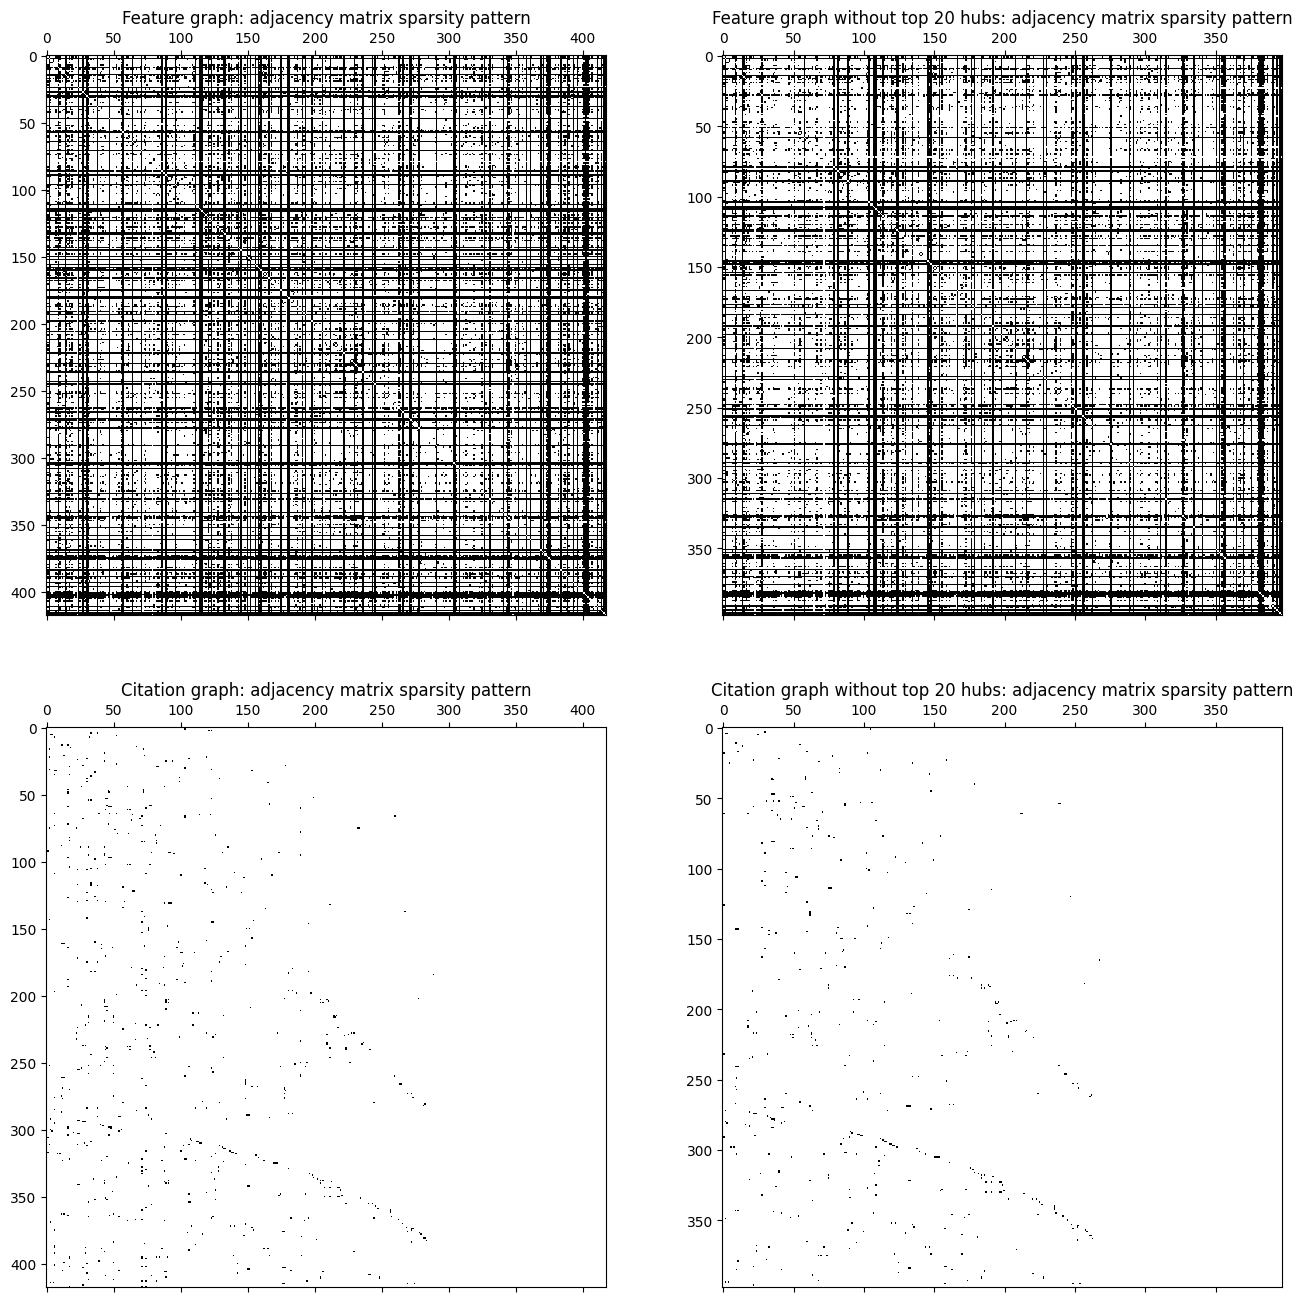

In [56]:
# Your solution here ###########################################################
# get degrees of the new unordered one
def compute_reduced_graph(adj, n_hubs=20):
    degrees = compute_in_degree(adj)
    # get the indices of the sorted degrees
    degree_sorted_idx = np.argsort(degrees)[::-1]
    # get the top n_hubs hubs
    hubs = degree_sorted_idx[:n_hubs]
    # remove the top n_hubs hubs
    reduced_adj = np.delete(np.delete(adj, hubs, axis=0), hubs, axis=1)
    return reduced_adj, hubs

reduced_A_citation, citation_hubs = compute_reduced_graph(A_citation)
reduced_A_feature, feature_hubs = compute_reduced_graph(A_feature)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

fig, axes = plt.subplots(2, 2, figsize=(16, 16))
axes[0, 0].set_title('Feature graph: adjacency matrix sparsity pattern')
axes[0, 0].spy(A_feature);
axes[0, 1].set_title('Feature graph without top 20 hubs: adjacency matrix sparsity pattern')
axes[0, 1].spy(reduced_A_feature);
axes[1, 0].set_title('Citation graph: adjacency matrix sparsity pattern')
axes[1, 0].spy(A_citation);
axes[1, 1].set_title('Citation graph without top 20 hubs: adjacency matrix sparsity pattern')
axes[1, 1].spy(reduced_A_citation);


**2.7 [1pt]** Plot the new degree distribution histograms.

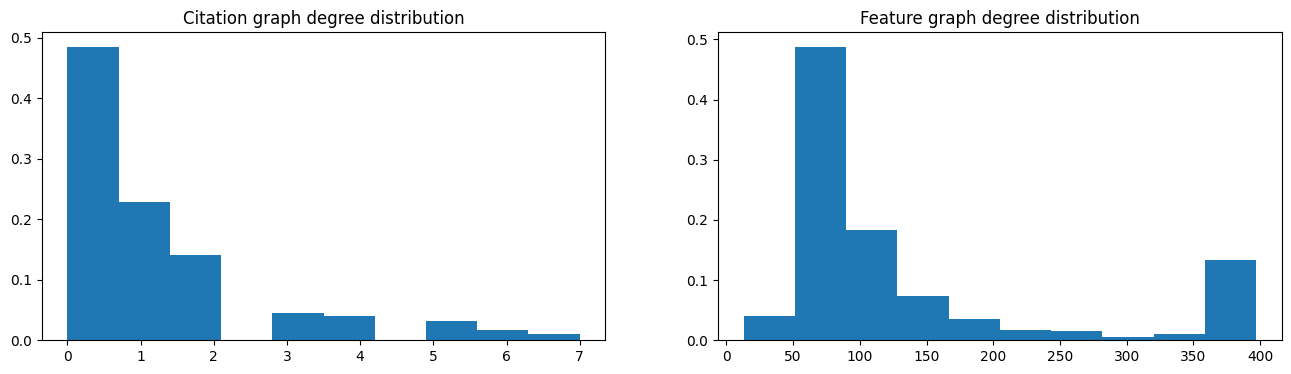

In [58]:
# Your solution here ###########################################################
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# Get the degrees in graph without hubs
reduced_degrees_cit = compute_in_degree(reduced_A_citation)
reduced_degrees_feat = compute_in_degree(reduced_A_feature)

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
deg_hist_normalization = np.ones(reduced_degrees_feat.shape[0]) / reduced_degrees_feat.shape[0]

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].set_title('Citation graph degree distribution')
axes[0].hist(reduced_degrees_cit, weights=deg_hist_normalization);
axes[1].set_title('Feature graph degree distribution')
axes[1].hist(reduced_degrees_feat, weights=deg_hist_normalization);

**2.8 [1pt]** Compute the first and second moments for the new graphs.

In [59]:
# Your solution here ###########################################################
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
reduced_cit_moment_1 = np.mean(reduced_degrees_cit)
reduced_cit_moment_2 = np.mean(reduced_degrees_cit ** 2)

reduced_feat_moment_1 = np.mean(reduced_degrees_feat)
reduced_feat_moment_2 = np.mean(reduced_degrees_feat ** 2)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
print("Citation graph first moment:", reduced_cit_moment_1)
print("Citation graph second moment:", reduced_cit_moment_2)
print("Feature graph first moment: ", reduced_feat_moment_1)
print("Feature graph second moment: ", reduced_feat_moment_2)

Citation graph first moment: 1.1457286432160805
Citation graph second moment: 3.7839195979899496
Feature graph first moment:  136.63316582914572
Feature graph second moment:  31107.35175879397


**2.9 [2pt]** Print the number of edges in the reduced graphs.

In [60]:
# Your solution here ###########################################################
print("Reduced feature graph edges:", reduced_A_feature.sum() // 2)
print("Reduced citation graph edges:", reduced_A_citation.sum() // 2)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Reduced feature graph edges: 27190
Reduced citation graph edges: 228


**2.10 [2pt]** Describe the effect of removing the hubs in both networks and compare them. Look at the percentage changes for each moment and explain which of the moments is affected the most and in which graph. Discuss about the meaning of this change.

**Hint:** Examine the degree distributions.

**Your answer here:** 

**Features graph**:
- Removed 35340 - 27190 = 8150 edges (-23.06%)
- First moment from 169.09 to 136.63 (-19.2%)
- Second moment from 43523.7 to 31107.35 (-28.53%)

**Citation graph**:
- Removed 848 - 228 =  620 edges (-73.11%)
- First moment from 3.96 to 1.15 (-70.969%)
- Second moment from 78.54 to 3.78 (-95.19%)

We see that the citation graph is more affected when removing the top 20 hubs. It makes sense by looking at the degree distribution. Indeed, the feature graph has more very high degree nodes, hence removing the hubs does not completely destroy the fat tail of the distribution. On the other hand, the citation graph now has max degree less than 10, which is low and explains the moments decrease.

### Question 3 [8pt]: Pruning, sparsity, paths

**3.1 [1pt]** By adjusting the threshold of the euclidean distance matrix, prune the feature graph so that its number of edges is roughly close (within a hundred edges) to the number of edges in the citation graph.

In [66]:
# Your solution here ###########################################################
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
def sparsify_graph(adjacency, distances, target_num_edges):
    # Sanity checks
    assert np.allclose(adjacency, adjacency.T), "Adjacency matrix must be symmetric"
    assert np.allclose(distances, distances.T), "Distance matrix must be symmetric"
    
    # Extract weight of edges
    edges_weights = distances[adjacency == 1]
    edges_weights = edges_weights.flatten()
    # Sort to find the threshold such that there are enough edges left
    edges_weights.sort()
    # Since the graph is undirected, every edge is counted twice hence
    #  we can skip every other element
    edges_weights = edges_weights[::2]
    thr = edges_weights[target_num_edges]
    # Create new adjacency matrix
    adjacency_feature_pruned = (D <= thr).astype(int)
    np.fill_diagonal(adjacency_feature_pruned, 0)
    return adjacency_feature_pruned

A_feature_pruned = sparsify_graph(A_feature, D, num_edges_citation)
num_edges_feature_pruned = A_feature_pruned.sum() // 2
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
print(f"Number of edges in the feature graph: {num_edges_feature}")
print(f"Number of edges in the feature graph after pruning: {num_edges_feature_pruned}")
print(f"Number of edges in the citation graph: {num_edges_citation}")

Number of edges in the feature graph: 35340
Number of edges in the feature graph after pruning: 881
Number of edges in the citation graph: 848


Check your results by comparing the sparsity patterns and total number of edges between the graphs.

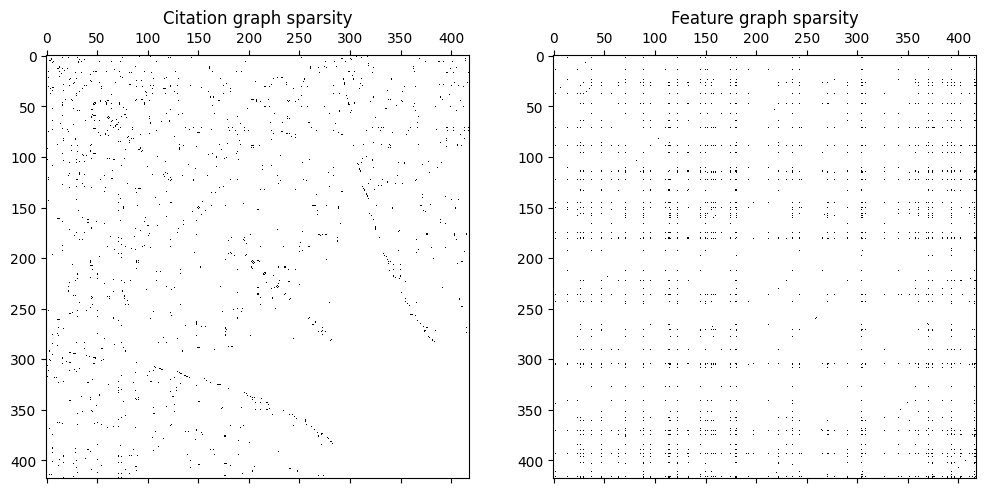

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].set_title('Citation graph sparsity')
axes[0].spy(A_citation);
axes[1].set_title('Feature graph sparsity')
axes[1].spy(A_feature_pruned);

Let $C_{k}(i,j)$ denote the number of paths of length $k$ from node $i$ to node $j$. 

We define the path matrix $P$, with entries
$ P_{ij} = \displaystyle\sum_{k=0}^{N}C_{k}(i,j). $

**3.2 [1pt]** Calculate the path matrices for both the citation and the unpruned feature graphs for $N =10$.  

*Hint:* Use [powers of the adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix#Matrix_powers).

In [24]:
# Your solution here ###########################################################
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
def compute_path_matrix(adjacency, max_dist):
    N = adjacency.shape[0]
    # Initialize path matrix
    path_matrix = np.zeros((N, N))
    accumulator = np.eye(N)
    for _ in range(max_dist):
        accumulator = adjacency @ accumulator
        path_matrix += accumulator

    return path_matrix

path_matrix_citation = compute_path_matrix(A_citation, 10)
path_matrix_feature = compute_path_matrix(A_feature, 10)

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Check the sparsity pattern for both of path matrices.

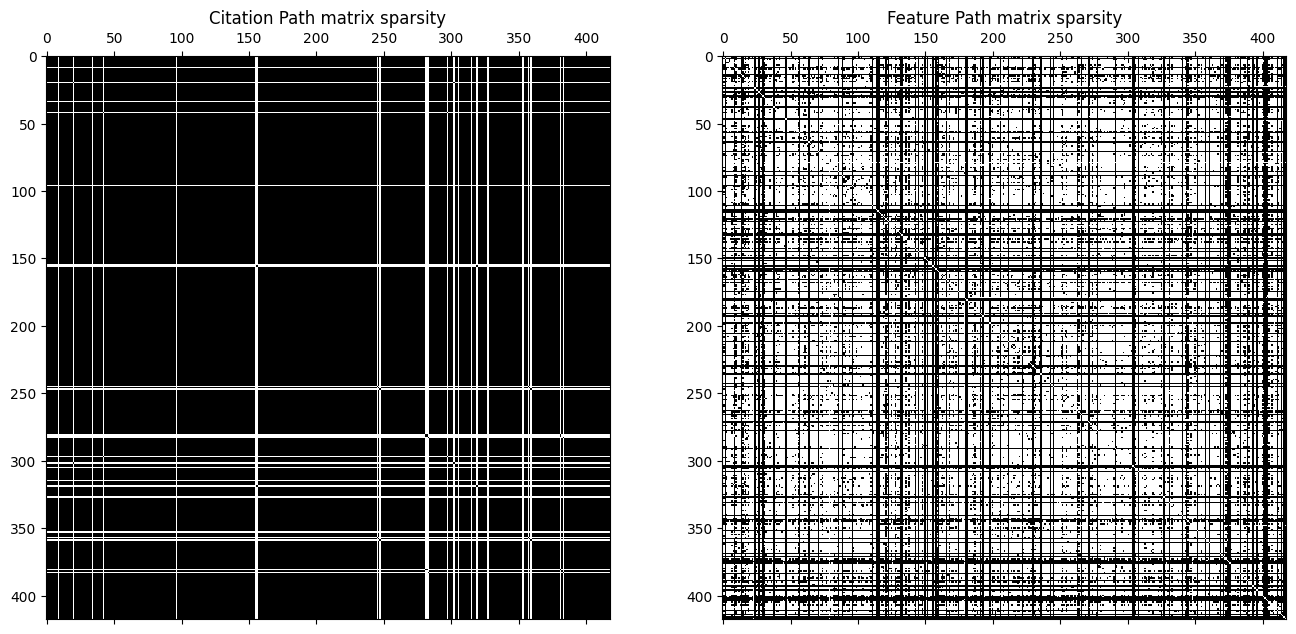

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16, 9))
axes[0].set_title('Citation Path matrix sparsity')
axes[0].spy(path_matrix_citation);
axes[1].set_title('Feature Path matrix sparsity')
axes[1].spy(A_feature);

**3.3 [2pt]** Now calculate the path matrix of the pruned feature graph for $N=10$. Plot the corresponding sparsity pattern.
Describe the differences and motivate.

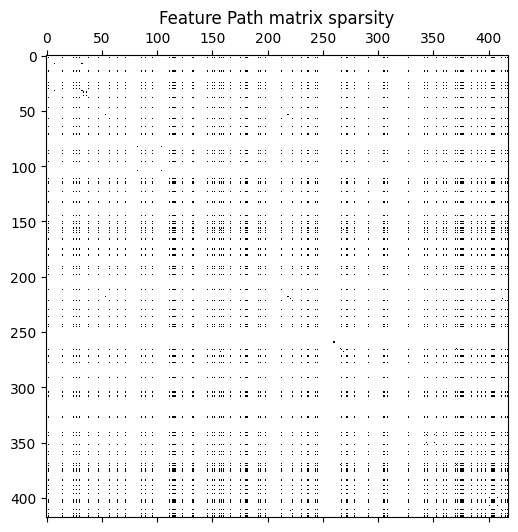

In [26]:
# Your solution here ###########################################################
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
path_matrix_pruned = compute_path_matrix(A_feature_pruned, 10)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
plt.figure(figsize=(12, 6))
plt.title('Feature Path matrix sparsity')
plt.spy(path_matrix_pruned);


**Your answer here:** As expected, the prunned feature's path matrix matrix is much sparser, which makes sense since we removed a lot of edges and might have disconnected some components.


**3.4 [2pt]** Describe how you can use the above process of counting paths to determine whether a graph is connected or not. State whether the original (unpruned) feature graph is connected.

**Your answer here:** If the graph has $N$ nodes and is connected, then there exist a path of length at most $N - 1$ between any two nodes, hence the path matrix of degree $N-1$ would have no non-zero entries. Conversely, if the graph is disconnected, there must be a zero entry in the path matrix of any order since some pair of nodes have no path between them.

**3.5 [1pt]** Supposing the graph is connected, describe how to measure its diameter using the path matrix.

**Your answer here:** The path matrix of max degree $k$ counts the number of paths between pairs of nodes that have length at most $k$. Assuming the graph is fully connected, we can compute the diameter by computing the path matrix for increasing values of $k$ until there are no non-zero entries left. The first such $k$ is the diameter since for smaller values, there exist a pair of nodes whose shortest path is longer, as denoted by the zero entry in the path matrix.


**3.6 [1pt]** If any of your graphs is connected, calculate the diameter using that process.

In [27]:
# Your solution here ###########################################################
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
def compute_diameter(adjacency):
    N, _ = adjacency.shape
    # Init value: impossible path matrix
    prev_pm = np.ones((N, N)) * -1
    for i in range(1, N):
        pm = compute_path_matrix(adjacency, i) > 0
        if np.all(pm > 0):
            return i
        # If the path matrix is the same as the previous one, there is no new path, hence no point in continuing anymore
        elif np.allclose(pm, prev_pm):
            return -1
        
        prev_pm = pm
    return -1

diameter = compute_diameter(A_feature)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

print(f"The diameter is: {diameter}")

The diameter is: 2


### Question 4 [8pt]: Shortest path

Here, we calculate the shortest path from a source node to a target node. A classic method for finding the shortest path on unweighted networks is Breadth-First Search (BFS) method. Check the BFS steps in the Lecture 'Graph Theory Basis'.

To this end, we first define a function for finding the neighboring nodes of a specified node x. 

In [28]:
### Get the neighboring set of node x
def find_neighbors(x):
    return [i for i in range(A_feature.shape[0]) if A_feature[x][i]>0]

**4.1 [2pt]** Calculate the path length from the source node to the target node by filling the missing code in the algorithm: 

In [29]:
### Find the shortest path from the source node to the target node:
source_node, target_node, path_length = 0, 10, 0
source_set = [source_node]
path = []
stop_finding = 0
iteration_number = A_feature.shape[0]
i = 0

# Special case
if source_node==target_node:

    # set stop_finding flag to 1 to indicate that the search can be stopped
    stop_finding = 1
    path.append([source_node,target_node,path_length])

while stop_finding == 0 and i < iteration_number:
    source_set_new = []
    for n in source_set:
        neighbors = find_neighbors(n)
        if target_node in neighbors:
            ### Your solution here #############################################

            path.append([n, target_node, path_length])
            
            #^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            stop_finding = 1
            break
        else:
            for nn in neighbors:
                ### Your solution here #########################################
                
                path.append([n, nn, path_length])

                #^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            source_set_new += neighbors
    path_length += 1
    source_set = source_set_new.copy()
    i += 1
if stop_finding == 0:
    path_length = ['Infinity']
    shortest_path = ['None']
else:
    child_node = target_node
    shortest_path = [target_node]
    for i in range(path_length-1,-1,-1):
        parent_node = [x for [x, y, z] in path if y==child_node and z==i]
        shortest_path.append(parent_node[0])
        child_node = parent_node[0] #Select one of the parent nodes as the child node in previous round
    shortest_path.reverse()

print(f"The shortest path length from node {source_node} to node {target_node} is: {path_length}")
print(f"One shortest path is: {shortest_path}")

The shortest path length from node 0 to node 10 is: 2
One shortest path is: [0, 2, 10]


**4.2 [2pt]** Get all edges visited by BFS starting from a source node by filling the missing lines in the following code: 

In [30]:
# All edges visited by BFS method starting from a source node
# All edges visited by BFS method starting from a source node
BFS_edges = []
unexplored_list = list(range(A_feature.shape[0]))
source_node = 0
source_set = [source_node]
unexplored_list.remove(source_node) 
stop_finding = 0
while stop_finding == 0:
    source_set_new = []
    for n in source_set:
        neighbors = find_neighbors(n)
        for nn in neighbors:
            if nn in unexplored_list:
                ### Your solution here #########################################

                BFS_edges.append((n, nn))
                unexplored_list.remove(nn)

                # if nn == target_node:
                #     stop_finding = 1  
                #     break
                #^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                source_set_new.append(nn)

        # ########## Break outer loop ###########
        # if stop_finding == 1:
        #     break

    if not source_set_new:
        stop_finding = 1      
    else:
        source_set = source_set_new.copy()
print(f"Edges visited by Breadth-First Search method starting from node {source_node}:")
list(BFS_edges)[:5]

Edges visited by Breadth-First Search method starting from node 0:


[(0, 2), (0, 7), (0, 9), (0, 14), (0, 15)]

**4.3 [2pt]** Explain the difference between BFS algorithm and the Dijkstra's algorithm.

**Your answer here:**

1. Dijkstra's algorithm is a weighted shortest path algorithm that is used for finding the shortest path in weighted graphs (with non negative weights), while BFS is an unweighted traversal algorithm that is used for traversing unweighted graphs.
2. In Dijkstra's algorithm, a priority queue is used to select which nodes to visit next based on their distance from the source node, whereas BFS traverses nodes based on the order they were visited (eg simply using a list, as we did in the previous question)


**4.4 [2pt]** Check if your guess was correct using [NetworkX](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.distance_measures.diameter.html).

*Note:* usage of NetworkX is only allowed in this part of Section 1.

Compute the diameter using NetworkX.

In [31]:
import networkx as nx
# Your solution here ###########################################################
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

G = nx.from_numpy_array(A_feature)
print(f"Diameter according to networkx: {nx.diameter(G)}")

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Diameter according to networkx: 2


Let us now check our results of BFS method using NetworkX:
<br>
(1) As before, print the first 5 BFS visited edges
<br>
(2) As before, calculate and print the shortest path length from node 0 to node 10 

In [32]:
# Your solution here ###########################################################
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

shortest_path = nx.shortest_path(G, source=0, target=10)

# Print the first 5 BFS visited edges
BFS_edges = list(nx.bfs_edges(G, source=0))
print(f"The first 5 BFS visited edges are: {BFS_edges[:5]}")

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

The first 5 BFS visited edges are: [(0, 2), (0, 7), (0, 9), (0, 14), (0, 15)]


In [33]:
# Your solution here ###########################################################
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

shortest_path_length = nx.shortest_path_length(G, source=0, target=10)
print(f"The shortest path length from node 0 to node 10 is: {shortest_path_length}")

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

The shortest path length from node 0 to node 10 is: 2
